**Use Linear Regression to Predict Sea Level Change**

---



In [4]:
# install / import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
# read data from file
# a dataset of the global average sea level change since 1880

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/epa-sea-level.csv')

In [80]:
# preview the data

df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


Text(0, 0.5, 'Sea Level (inches)')

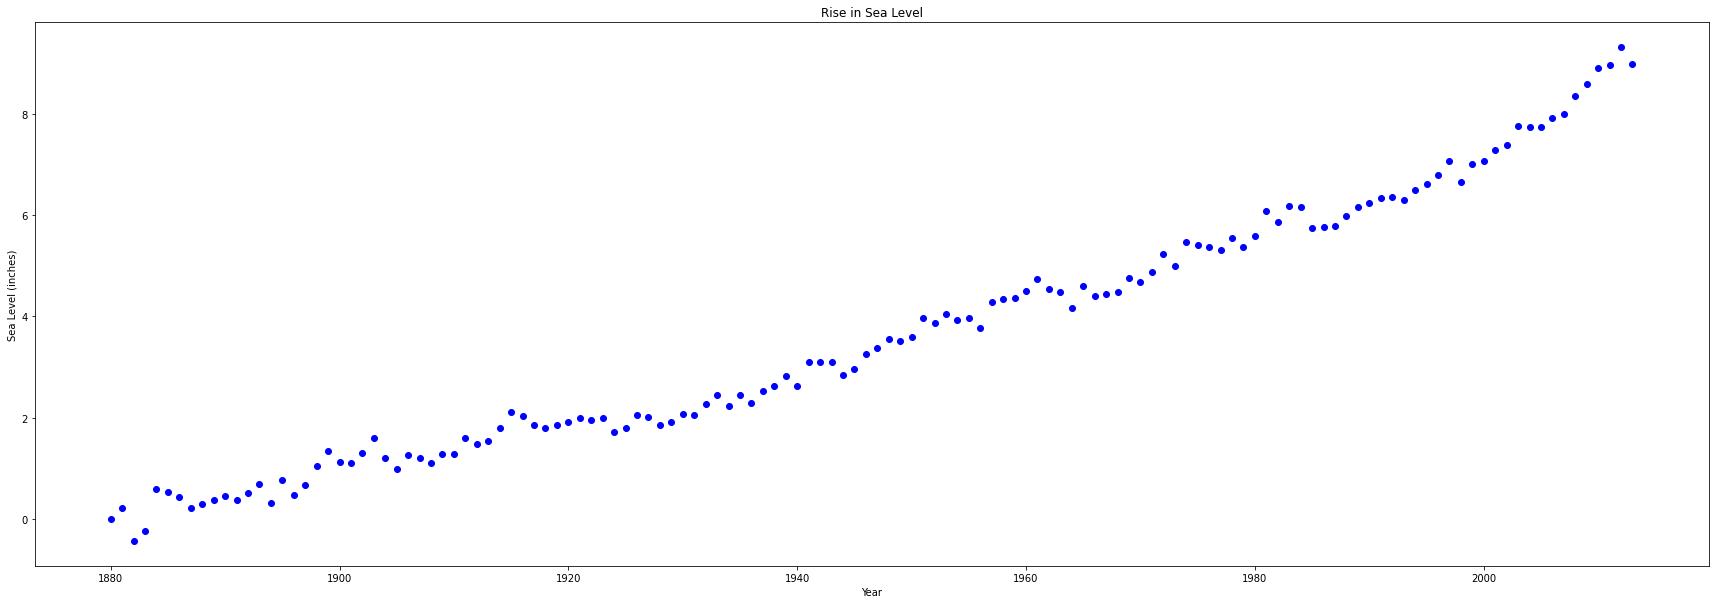

In [81]:
# plot 'CSIRO Adjusted Sea Level'

plt.subplots(figsize=(30,10))

plt.scatter(
    x=df['Year'],
    y=df['CSIRO Adjusted Sea Level'],
    c='b')

plt.title("Rise in Sea Level")
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

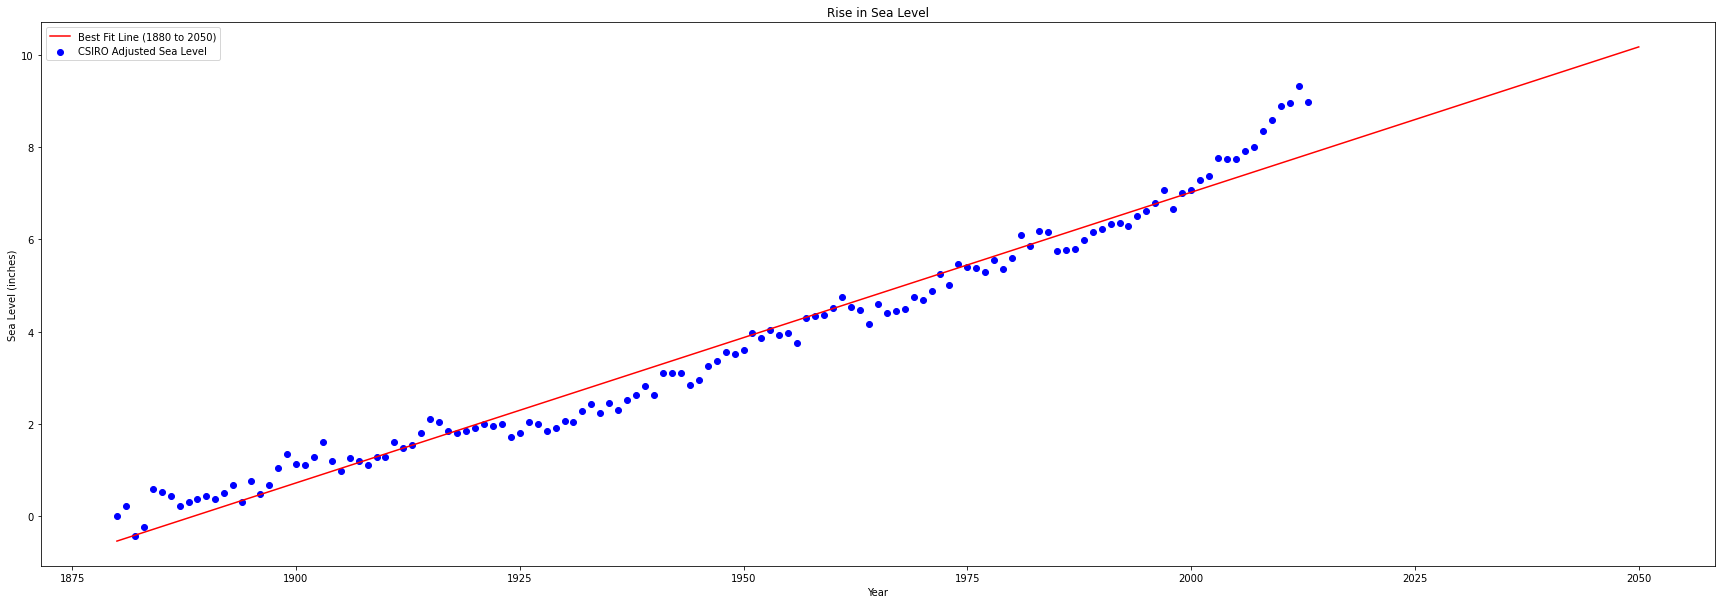

In [82]:
# use 'linregress' to create a best fit line from 1880 to 2050

res = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
x_pred = pd.Series(i for i in range(1880,2051))
y_pred = res.slope*x_pred + res.intercept


plt.subplots(figsize=(30,10))

plt.scatter(
    x=df['Year'],
    y=df['CSIRO Adjusted Sea Level'],
    c='b')

plt.plot(x_pred, y_pred, "r")

plt.title("Rise in Sea Level")
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

plt.legend(['Best Fit Line (1880 to 2050)', 'CSIRO Adjusted Sea Level'])


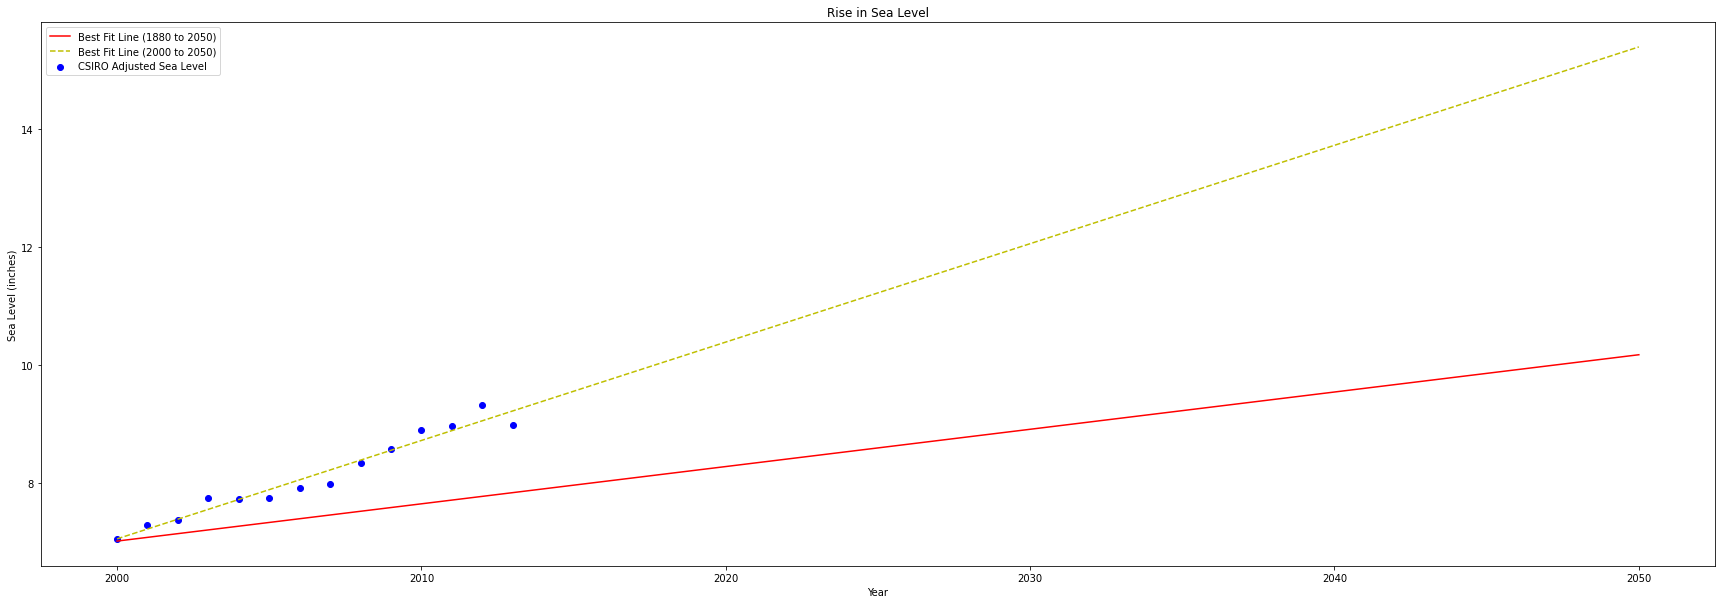

In [83]:
# create a best fit line from 2000 to 2050
# what would be the sea level rise in 2050 if the rate of rise continues as it has since the year 2000

df2 = df[df['Year'] >= 2000]

res2 = linregress(df2['Year'], df2['CSIRO Adjusted Sea Level'])
x_pred2 = pd.Series(i for i in range(2000,2051))
y_pred2 = res2.slope*x_pred2 + res2.intercept


plt.subplots(figsize=(30,10))

plt.scatter(
    x=df2['Year'],
    y=df2['CSIRO Adjusted Sea Level'],
    c='b')

plt.plot(x_pred[x_pred.index >= 120], y_pred[y_pred.index >= 120], "r")

plt.plot(x_pred2, y_pred2, "y--")

plt.title("Rise in Sea Level")
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

plt.legend(['Best Fit Line (1880 to 2050)', 'Best Fit Line (2000 to 2050)', 'CSIRO Adjusted Sea Level'])
